# Query 5.1


For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
%matplotlib inline



In [2]:
file = pd.read_csv('Module2.csv')

In [3]:
df = pd.DataFrame(file)

In [4]:
df['Date'] = pd.to_datetime(df['Date.1'], format = '%Y-%m-%d')
df.index = df['Date']

In [5]:
df = df.drop(['Date.1', 'Date.1.1', 'Date'], axis = 1)

In [6]:
df.fillna(0, inplace = True)

In [7]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,vwap,Day_Perc_Change,Trend,UpperBB,LowerBB,MiddleBB
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,...,3052819,83.67,5,2017,951.550000,0.000000,Slight or No change,0.0,0.0,0.0
2017-05-16,INFY,EQ,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,...,1858063,60.62,5,2017,953.125077,0.003626,Slight or No change,0.0,0.0,0.0
2017-05-17,INFY,EQ,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,...,792251,54.35,5,2017,953.067084,-0.002304,Slight or No change,0.0,0.0,0.0
2017-05-18,INFY,EQ,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,...,2309450,57.32,5,2017,955.934447,0.009393,Slight or No change,0.0,0.0,0.0
2017-05-19,INFY,EQ,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,...,1457747,68.48,5,2017,956.233874,-0.003951,Slight or No change,0.0,0.0,0.0


In [8]:
df['Daily Return'] = df['Close Price'].pct_change()


mean_daily_return = df['Daily Return'].mean()
std_daily_return = df['Daily Return'].std()

annual_mean = mean_daily_return *252
annual_std = std_daily_return* sqrt(252)

# (Alternate Formula) volatility = df['Close Price'].pct_change().rolling(7).std(ddof=0)

print('The annualised mean return of the stock Infosys is:', annual_mean,
     '\nAnd the annual volatility is:', annual_std)




The annualised mean return of the stock Infosys is: -0.023616974282489874 
And the annual volatility is: 0.41899354042406095


# Query 5.2

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

Choosing stocks to diversify the portfolio: 
- Large Cap:
    - INFY
    - RELIANCE
- Medium Cap:
    - RBLBANK
    - MINDTREE
- Small Cap:
    - FORTIS

In [9]:
file1 = pd.read_csv('Large_Cap/RELIANCE.csv')
file2 = pd.read_csv('Mid_Cap/RBLBANK.csv')
file3 = pd.read_csv('Mid_Cap/MINDTREE.csv')
file4 = pd.read_csv('Small_Cap/FORTIS.csv')

In [10]:
reliance = pd.DataFrame(file1)
rbl = pd.DataFrame(file2)
m_tree= pd.DataFrame(file3)
fortis = pd.DataFrame(file4)

In [11]:
reliance['Date'] = pd.to_datetime(reliance['Date'], format = '%d-%b-%Y')
reliance.index = reliance['Date']

rbl['Date'] = pd.to_datetime(rbl['Date'], format = '%d-%b-%Y')
rbl.index = rbl['Date']

m_tree['Date'] = pd.to_datetime(m_tree['Date'], format = '%d-%b-%Y')
m_tree.index = m_tree['Date']

fortis['Date'] = pd.to_datetime(fortis['Date'], format = '%d-%b-%Y')
fortis.index = fortis['Date']

In [12]:
#Removing Duplicated Rows:

df = df[~df.index.duplicated()]
reliance = reliance[~reliance.index.duplicated()]
rbl = rbl[~rbl.index.duplicated()]
m_tree = m_tree[~m_tree.index.duplicated()]
fortis = fortis[~fortis.index.duplicated()]

In [13]:
final_df = pd.concat([df['Close Price'], reliance['Close Price'], 
                     rbl['Close Price'], m_tree['Close Price'], fortis['Close Price']], axis=1)

final_df.columns = ['INFY', 'RELIANCE', "RBL", 'MINDTREE', 'FORTIS']


In [14]:
#Checking for any null values present in the database
final_df.isnull().values.any()

False

In [15]:
final_df.head()

,INFY,RELIANCE,RBL,MINDTREE,FORTIS
Date,,,,,
2017-05-15,951.55,1344.10,563.90,509.45,205.25
2017-05-16,955.00,1356.30,562.60,511.30,207.90
2017-05-17,952.80,1353.10,564.25,506.35,205.90
2017-05-18,961.75,1327.35,552.15,492.90,196.85
2017-05-19,957.95,1318.85,555.45,497.50,203.55


In [16]:
# As all weights are the same, i.e, 20%

weights = np.asarray([0.2,0.2,0.2,0.2,0.2])

#Calculating returns for the df, in the dataframe
returns = final_df.pct_change()



In [17]:
returns.head()

,INFY,RELIANCE,RBL,MINDTREE,FORTIS
Date,,,,,
2017-05-15,NaN,NaN,NaN,NaN,NaN
2017-05-16,0.003626,0.009077,-0.002305,0.003631,0.012911
2017-05-17,-0.002304,-0.002359,0.002933,-0.009681,-0.009620
2017-05-18,0.009393,-0.019030,-0.021444,-0.026563,-0.043953
2017-05-19,-0.003951,-0.006404,0.005977,0.009333,0.034036


In [18]:
#Calculating mean daily returns and covariance of daily returns: 
mean_daily = returns.mean()
cov_matrix = returns.cov()

In [19]:
#Mean Annual
annual_portfolio_return = np.sum(mean_daily * weights)*252
#Volatility
annual_std_dev = sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*sqrt(252
                                                                          )

In [20]:
print('Portfolio Expected Annual Return is {}.\nPortfolio Volatility is {}'.format(annual_portfolio_return, annual_std_dev))



Portfolio Expected Annual Return is 0.08478784769755185.
Portfolio Volatility is 0.19871066817743754


# Query 5.3

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

As the Sharpe would be the same always, the plot would not be ideal. For this scenario, we'll use different weights, all generated at random to see which one is the most optimal in Query 5.4. 

This type of simulation is called the Monte Carlo simulation, generates different weights for individual stocks as it runs for 1000s of times. 

In [21]:
#Number of runs for portfolio weights:
num_portfolios = 7000

#Array to hold results:
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(5)
    #Rebalancing weights to sum to 1
    weights /=np.sum(weights)
    
    portfolio_return = np.sum(mean_daily*weights)*252
    portfolio_std = sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*sqrt(252)
    
    #Storing in results matrix:
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    
    #Sharpe ratio as the 3rd criteria: return/volatility:
    
    results[2,i] = portfolio_return/portfolio_std
    
    

In [22]:
results

array([[0.08292412, 0.03019742, 0.07976783, ..., 0.01469333, 0.1990347 ,
        0.11726165],
       [0.24108193, 0.23745208, 0.23790979, ..., 0.21224019, 0.23015987,
        0.20889896],
       [0.34396654, 0.12717269, 0.33528604, ..., 0.06922972, 0.86476718,
        0.5613319 ]])

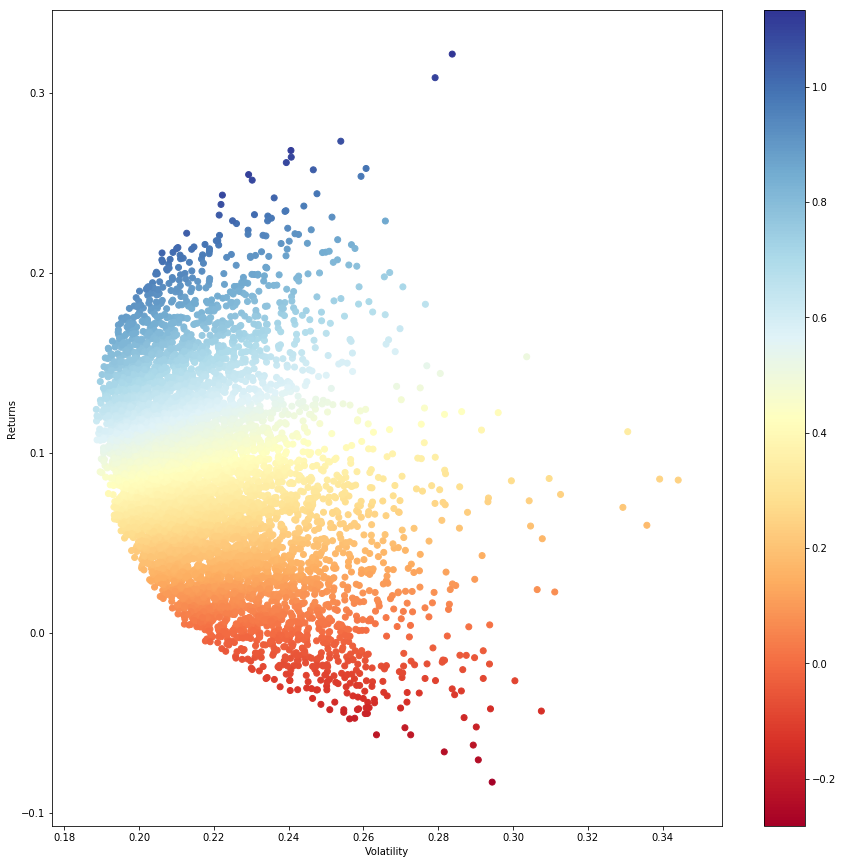

In [23]:
#Transpose of results to make columns from rows
plt.figure(figsize=(15,15))
results_frame = pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe'])

#Creating Scatter Plot

plt.scatter(results_frame.stdev, results_frame.ret, c= results_frame.sharpe, cmap = 'RdYlBu' )
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()


# Query 5.4

Mark the 2 portfolios where -
- Portfolio 1 - The Sharpe ratio is the highest
- Portfolio 2 - The volatility is the lowest. 

In [26]:
#Number of runs for portfolio weights:
num_portfolios = 7000

#Array to hold results with weight values for each stock:
results = np.zeros((4+len(final_df.columns)-1, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(5)
    #Rebalancing weights to sum to 1
    weights /=np.sum(weights)
    
    portfolio_return = np.sum(mean_daily*weights)*252
    portfolio_std = sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*sqrt(252)
    
    #Storing in results matrix:
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std
    
    #Sharpe ratio as the 3rd criteria: return/volatility:
    
    results[2,i] = portfolio_return/portfolio_std
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
        

        
        
        

In [29]:
results_frame = pd.DataFrame(results.T,
                             columns=['ret','stdev','sharpe',
final_df.columns[0], final_df.columns[1],final_df.columns[2],final_df.columns[3], final_df.columns[4]])





In [31]:
results_frame.head()

,ret,stdev,sharpe,INFY,RELIANCE,RBL,MINDTREE,FORTIS
0,0.037814,0.201861,0.187328,0.164016,0.094625,0.499770,0.022202,0.219387
1,0.049753,0.221792,0.224321,0.092526,0.337440,0.264217,0.068845,0.236972
2,0.138105,0.222610,0.620392,0.014947,0.145080,0.134018,0.396648,0.309307
3,0.063083,0.219914,0.286853,0.186338,0.152765,0.072293,0.244811,0.343793
4,0.070463,0.218037,0.323171,0.189513,0.337138,0.337609,0.050033,0.085707


In [32]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

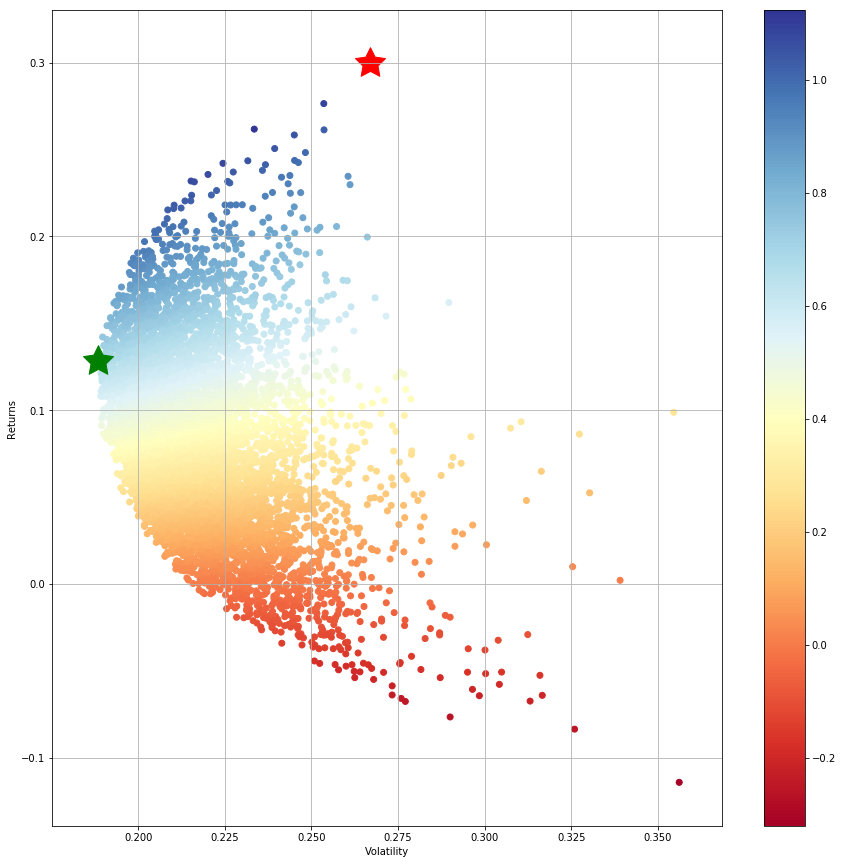

In [35]:
plt.figure(figsize=(15,15))

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.grid()
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [36]:
print(max_sharpe_port)

ret         0.299726
stdev       0.266948
sharpe      1.122786
INFY        0.003123
RELIANCE    0.164071
RBL         0.080824
MINDTREE    0.716829
FORTIS      0.035153
Name: 595, dtype: float64
